# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pyforest
import plotly
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_female = pd.read_csv("ANSUR II FEMALE Public.csv")
df_male= pd.read_csv('ANSUR II MALE Public.csv',encoding='latin-1')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [4]:
df_female.rename(columns={'SubjectId':'subjectid'},inplace=True)

In [5]:
df_female.Ethnicity.isnull().sum()

1467

In [6]:
df_male.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [7]:
df = pd.concat([df_female,df_male])

<IPython.core.display.Javascript object>

In [8]:
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [9]:
df.shape

(6068, 108)

In [10]:
df.Ethnicity.isnull().sum()

4647

In [11]:
df.isnull().any()

subjectid                         False
abdominalextensiondepthsitting    False
acromialheight                    False
acromionradialelength             False
anklecircumference                False
axillaheight                      False
balloffootcircumference           False
balloffootlength                  False
biacromialbreadth                 False
bicepscircumferenceflexed         False
bicristalbreadth                  False
bideltoidbreadth                  False
bimalleolarbreadth                False
bitragionchinarc                  False
bitragionsubmandibulararc         False
bizygomaticbreadth                False
buttockcircumference              False
buttockdepth                      False
buttockheight                     False
buttockkneelength                 False
buttockpopliteallength            False
calfcircumference                 False
cervicaleheight                   False
chestbreadth                      False
chestcircumference                False


In [12]:
col = pd.DataFrame(df.columns)

<IPython.core.display.Javascript object>

In [13]:
df.drop(columns=['subjectid','SubjectNumericRace','Ethnicity','Heightin','Weightlbs','Date','Installation','Component','Branch','PrimaryMOS'],axis = 1,inplace=True)

In [14]:
df['weightkg'] = df['weightkg']/10

In [15]:
df.shape

(6068, 98)

In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
df.shape

(6068, 98)

In [18]:
df.shape

(6068, 98)

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [19]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [20]:
df = df[df["DODRace"].isin([1,2,3])]

In [21]:
df.DODRace.value_counts(dropna = False)

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [22]:
df.shape

(5769, 98)

In [23]:
df.reset_index(drop=True,inplace=True)

In [24]:
df.shape

(5769, 98)

In [25]:
df3 = df.copy()

In [26]:
def color_red(val):
  
    if val > 0.90 and val < 99:
        color = 'red'
    elif val>1:
        color = 'blue'
    else:
        color = 'black'
    return 'color: %s' % color

In [27]:
pd.DataFrame(df).corr().style.applymap(color_red)

<IPython.core.display.Javascript object>

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting


In [28]:
feature = []
collinear = []

In [29]:
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
#df.drop(df[to_drop], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [30]:
df = df[df.DODRace < 4]

In [31]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [32]:
df = pd.get_dummies(df, drop_first =True)

<IPython.core.display.Javascript object>

In [33]:
df.isnull().any()

abdominalextensiondepthsitting                  False
acromialheight                                  False
acromionradialelength                           False
anklecircumference                              False
axillaheight                                    False
balloffootcircumference                         False
balloffootlength                                False
biacromialbreadth                               False
bicepscircumferenceflexed                       False
bicristalbreadth                                False
bideltoidbreadth                                False
bimalleolarbreadth                              False
bitragionchinarc                                False
bitragionsubmandibulararc                       False
bizygomaticbreadth                              False
buttockcircumference                            False
buttockdepth                                    False
buttockheight                                   False
buttockkneelength           

In [34]:
df["DODRace"] = df.DODRace.map({1 : 0, 2 : 1, 3 : 2})

In [35]:
X = df.drop("DODRace", axis = 1)
y = df.DODRace

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y ,random_state=42)

<IPython.core.display.Javascript object>

## 1. Logistic model

## Model Evaluation Function

In [37]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print()
    
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Vanilla Logistic Model

Vanilla modelin anlami; default degerler ile model kurulmasidir.

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=42)  

log_model.fit(X_train_scaled,y_train)

y_pred = log_model.predict(X_test_scaled)

eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[662  14  82]
 [  9 239  12]
 [ 20   8 108]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       758
           1       0.92      0.92      0.92       260
           2       0.53      0.79      0.64       136

    accuracy                           0.87      1154
   macro avg       0.80      0.86      0.82      1154
weighted avg       0.90      0.87      0.88      1154


Train_Set
[[2606   66  362]
 [  33  970   35]
 [  67   21  455]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3034
           1       0.92      0.93      0.93      1038
           2       0.53      0.84      0.65       543

    accuracy                           0.87      4615
   macro avg       0.80      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



## With Pipeline

In [40]:
from sklearn.pipeline import Pipeline

operations = [("scaler", MinMaxScaler()), ("log_pipeline", LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42))]

pipe_model=Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

y_pred = pipe_model.predict(X_test)

eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[662  14  82]
 [  9 239  12]
 [ 20   8 108]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       758
           1       0.92      0.92      0.92       260
           2       0.53      0.79      0.64       136

    accuracy                           0.87      1154
   macro avg       0.80      0.86      0.82      1154
weighted avg       0.90      0.87      0.88      1154


Train_Set
[[2606   66  362]
 [  33  970   35]
 [  67   21  455]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3034
           1       0.92      0.93      0.93      1038
           2       0.53      0.84      0.65       543

    accuracy                           0.87      4615
   macro avg       0.80      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In [41]:
f1_2 = make_scorer(f1_score, average=None, labels=[2])
precision_2 = make_scorer(precision_score, average=None, labels=[2])
recall_2 = make_scorer(recall_score, average=None, labels=[2])

scores = cross_validate(pipe_model, X_train, y_train, scoring = {'f1_2':f1_2, 
                                                                 'precision_2':precision_2, 
                                                                 'recall_2':recall_2}, 
                                                                 cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_2           0.603955
test_precision_2    0.496707
test_recall_2       0.773266
dtype: float64

## Logistic Model GridSearch CV

In [42]:
operations = [("scaler", MinMaxScaler()), ("log_pipeline", LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42))]

pipe_model=Pipeline(steps=operations)

f1_2 = make_scorer(f1_score, average=None, labels=[2])

C = np.logspace(-1, 5, 20)        #  linspace(0.1, 2, 10)
penalty = ["l1", "l2"]
class_weight= ["balanced", None]  # balanced
solver = ["liblinear", "saga"]    # "liblinear", "lbfgs"

param_grid = {'log_pipeline__C': C,
              'log_pipeline__penalty': penalty,
              'log_pipeline__class_weight':class_weight,
              'log_pipeline__solver': solver }

LOGpipe_model_grid = GridSearchCV(pipe_model, param_grid, scoring = f1_2, cv = 5,  n_jobs = -1)

<IPython.core.display.Javascript object>

In [43]:
LOGpipe_model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log_pipeline',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'log_pipeline__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'log_pipeline__class_weight': ['balanced', None],
                         'log_pipeline__penalty': ['l1', 'l2'],
                         'log_pipeline__solver': ['liblinear', 'saga']},
             scoring=make_scorer(f1_score, average=None, labels=[2]))

In [44]:
LOGpipe_model_grid.best_params_

{'log_pipeline__C': 7.847599703514611,
 'log_pipeline__class_weight': 'balanced',
 'log_pipeline__penalty': 'l2',
 'log_pipeline__solver': 'liblinear'}

In [45]:
eval_metric(LOGpipe_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[713  12  33]
 [ 13 243   4]
 [ 40   7  89]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       758
           1       0.93      0.93      0.93       260
           2       0.71      0.65      0.68       136

    accuracy                           0.91      1154
   macro avg       0.85      0.84      0.85      1154
weighted avg       0.90      0.91      0.90      1154


Train_Set
[[2855   39  140]
 [  38  989   11]
 [ 124   25  394]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3034
           1       0.94      0.95      0.95      1038
           2       0.72      0.73      0.72       543

    accuracy                           0.92      4615
   macro avg       0.87      0.87      0.87      4615
weighted avg       0.92      0.92      0.92      4615



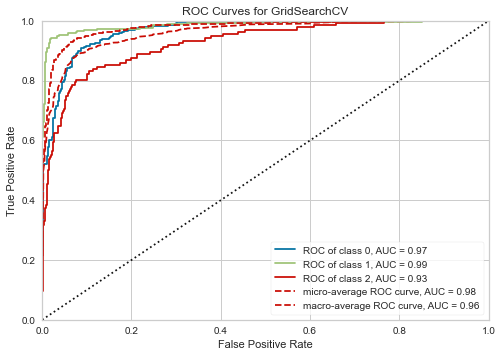

In [46]:
from yellowbrick.classifier import ROCAUC

model = LOGpipe_model_grid
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(); 

In [47]:
from sklearn.pipeline import Pipeline

operations = [("scaler", MinMaxScaler()), ("best_log_pipeline", LogisticRegression(C = 7.847599703514611, 
                                                                                   class_weight='balanced', max_iter=10000, 
                                                                                   penalty = 'l2', solver = 'liblinear', 
                                                                                   random_state=42))]

bestLOGmodel=Pipeline(steps=operations)

bestLOGmodel.fit(X_train, y_train)


f1_2 = make_scorer(f1_score, average=None, labels=[2])
precision_2 = make_scorer(precision_score, average=None, labels=[2])
recall_2 = make_scorer(recall_score, average=None, labels=[2])

scores = cross_validate(bestLOGmodel, X_train, y_train, scoring = {'bestLOGmodel_f1_2':f1_2, 
                                                                   'bestLOGmodel_precision_2':precision_2, 
                                                                   'bestLOGmodel_recall_2':recall_2}, 
                                                                   cv = 5)

bestLOGmodel_scores = pd.DataFrame(scores, index = range(1, 6))
bestLOGmodel_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_bestLOGmodel_f1_2           0.663533
test_bestLOGmodel_precision_2    0.673815
test_bestLOGmodel_recall_2       0.655708
dtype: float64

In [48]:
LOG_scores = bestLOGmodel_scores.mean()[2:]
LOG_scores

test_bestLOGmodel_f1_2           0.663533
test_bestLOGmodel_precision_2    0.673815
test_bestLOGmodel_recall_2       0.655708
dtype: float64

## Lojistic Regression solver "liblenear" for small dataset

__liblenear__ kucuk datasetlerinde iyi sonuclar verir. Dikkat edilmesi gereken husus; liblinear sadece __penalty="l1"__ ile calisir, yoksa hata verir.

## 2. SVC

### Vanilla SVC model 

Vanilla modellerde default degerler verilmeli ama dengesiz bir datasetimiz oldugu icin  class_weight düşünülmeli

In [49]:
operations = [("scaler", MinMaxScaler()), ("SVC_pipeline", SVC(random_state=42))]
SVCpipe_model=Pipeline(steps=operations)

SVCpipe_model.fit(X_train, y_train)

y_pred = SVCpipe_model.predict(X_test)

eval_metric(SVCpipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[753   4   1]
 [ 30 229   1]
 [ 93  10  33]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       758
           1       0.94      0.88      0.91       260
           2       0.94      0.24      0.39       136

    accuracy                           0.88      1154
   macro avg       0.91      0.71      0.74      1154
weighted avg       0.89      0.88      0.86      1154


Train_Set
[[3010   20    4]
 [ 123  915    0]
 [ 381   31  131]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3034
           1       0.95      0.88      0.91      1038
           2       0.97      0.24      0.39       543

    accuracy                           0.88      4615
   macro avg       0.92      0.70      0.74      4615
weighted avg       0.89      0.88      0.86      4615



###  SVC Model GridsearchCV

In [50]:
operations = [("scaler", MinMaxScaler()), ("SVC_pipeline", SVC(probability=True, class_weight="balanced", random_state=42))]
pipe_model=Pipeline(steps=operations)

f1_2 = make_scorer(f1_score, average=None, labels=[2])
#precision_2 = make_scorer(precision_score, average=None, labels=[2])
#recall_2 = make_scorer(recall_score, average=None, labels=[2])

#scoring = {'SVC_f1_2':f1_2, 'SVC_precision_2':precision_2, 'SVC_recall_2':recall_2}

param_grid = {'SVC_pipeline__C': [0.01, 0.05, 0.1, 0.3, 1],         # 1,2,3
              'SVC_pipeline__gamma': ["scale", "auto", 0.2, 0.3],   # 1, 0.1, 0.01 scale ve auto
              'SVC_pipeline__kernel': ['rbf', 'linear']}            # default

SVCpipe_model_grid = GridSearchCV(pipe_model, param_grid, 
                                  scoring = f1_2, verbose=2, n_jobs = -1)
SVCpipe_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVC_pipeline',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'SVC_pipeline__C': [0.01, 0.05, 0.1, 0.3, 1],
                         'SVC_pipeline__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC_pipeline__kernel': ['rbf', 'linear']},
             scoring=make_scorer(f1_score, average=None, labels=[2]),
             verbose=2)

In [51]:
SVCpipe_model_grid.best_params_

{'SVC_pipeline__C': 1,
 'SVC_pipeline__gamma': 0.3,
 'SVC_pipeline__kernel': 'rbf'}

In [52]:
eval_metric(SVCpipe_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[675  14  69]
 [ 11 239  10]
 [ 22  12 102]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       758
           1       0.90      0.92      0.91       260
           2       0.56      0.75      0.64       136

    accuracy                           0.88      1154
   macro avg       0.81      0.85      0.82      1154
weighted avg       0.90      0.88      0.89      1154


Train_Set
[[2755   25  254]
 [  20 1002   16]
 [  36    7  500]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      3034
           1       0.97      0.97      0.97      1038
           2       0.65      0.92      0.76       543

    accuracy                           0.92      4615
   macro avg       0.87      0.93      0.89      4615
weighted avg       0.94      0.92      0.93      4615



In [53]:
from sklearn.pipeline import Pipeline

operations = [("scaler", MinMaxScaler()), ("best_SVC_pipeline", SVC(C = 1, gamma = 0.3, 
                                                                    kernel = 'rbf', probability=True, 
                                                                    class_weight="balanced", random_state=42))]

bestSVCmodel=Pipeline(steps=operations)

bestSVCmodel.fit(X_train, y_train)


f1_2 = make_scorer(f1_score, average=None, labels=[2])
precision_2 = make_scorer(precision_score, average=None, labels=[2])
recall_2 = make_scorer(recall_score, average=None, labels=[2])

scores = cross_validate(bestSVCmodel, X_train, y_train, scoring = {'bestSVCmodel_f1_2':f1_2, 
                                                                   'bestSVCmodel_precision_2':precision_2, 
                                                                   'bestSVCmodel_recall_2':recall_2}, 
                                                                   cv = 5)

bestSVCmodel_scores = pd.DataFrame(scores, index = range(1, 6))
bestSVCmodel_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_bestSVCmodel_f1_2           0.607578
test_bestSVCmodel_precision_2    0.527651
test_bestSVCmodel_recall_2       0.716514
dtype: float64

In [77]:
SVC_scores = bestSVCmodel_scores.mean()[2:]
SVC_scores

test_bestSVCmodel_f1_2           0.607578
test_bestSVCmodel_precision_2    0.527651
test_bestSVCmodel_recall_2       0.716514
dtype: float64

## 3. RF

## Vanilla RF Model

In [54]:
df3.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,65.7,152,756,Female,Germany,2,26,Right hand
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,53.4,155,815,Female,California,3,21,Right hand
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,66.3,162,799,Female,Texas,1,23,Right hand
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,78.2,173,818,Female,District of Columbia,2,22,Right hand
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,88.6,152,762,Female,Texas,1,45,Right hand


In [55]:
df3["DODRace"] = df3.DODRace.map({1 : 0, 2 : 1, 3 : 2})

In [56]:
df3.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,65.7,152,756,Female,Germany,1,26,Right hand
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,53.4,155,815,Female,California,2,21,Right hand
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,66.3,162,799,Female,Texas,0,23,Right hand
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,78.2,173,818,Female,District of Columbia,1,22,Right hand
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,88.6,152,762,Female,Texas,0,45,Right hand


In [57]:
from sklearn.preprocessing import OrdinalEncoder

objectColumns = df3.select_dtypes("object").columns
objectColumns

encoder = OrdinalEncoder()
df3[objectColumns] = encoder.fit_transform(df3[objectColumns])            
df3.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,65.7,152,756,0.0,41.0,1,26,2.0
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,53.4,155,815,0.0,18.0,2,21,2.0
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,66.3,162,799,0.0,119.0,0,23,2.0
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,78.2,173,818,0.0,30.0,1,22,2.0
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,88.6,152,762,0.0,119.0,0,45,2.0


In [58]:
X2 = df3.drop("DODRace", axis = 1)
y2 = df3.DODRace

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, stratify = y2 ,random_state=42)

<IPython.core.display.Javascript object>

In [59]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state=42)

rf_model.fit(X2_train, y2_train)

eval_metric(rf_model, X2_train, y2_train, X2_test, y2_test)

Test_Set
[[748   9   1]
 [ 75 185   0]
 [120  11   5]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       758
           1       0.90      0.71      0.80       260
           2       0.83      0.04      0.07       136

    accuracy                           0.81      1154
   macro avg       0.84      0.58      0.58      1154
weighted avg       0.82      0.81      0.77      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### RF Model GridsearchCV

In [60]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42)

param_grid = {'n_estimators':[50, 64, 100, 128, 300, 400, 500],     
             'max_features':[2, 3, 4, "auto"],             
             'max_depth':[3, 6, 9, 12, 15],
             'min_samples_split':[5, 10, 15, 20]}

f1_2 = make_scorer(f1_score, average=None, labels=[2])
#precision_2 = make_scorer(precision_score, average=None, labels=[2])
#recall_2 = make_scorer(recall_score, average=None, labels=[2])

#scoring = {'RF_f1_2':f1_2, 'RF_precision_2':precision_2, 'RF_recall_2':recall_2}


RF3_model_grid = GridSearchCV(model, param_grid, scoring = f1_2, n_jobs = -1, verbose = 2)

In [61]:
RF3_model_grid.fit(X2_train, y2_train)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12, 15],
                         'max_features': [2, 3, 4, 'auto'],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [50, 64, 100, 128, 300, 400, 500]},
             scoring=make_scorer(f1_score, average=None, labels=[2]),
             verbose=2)

In [62]:
eval_metric(RF3_model_grid, X2_train, y2_train, X2_test, y2_test)

Test_Set
[[649  28  81]
 [ 41 210   9]
 [ 62  15  59]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       758
           1       0.83      0.81      0.82       260
           2       0.40      0.43      0.41       136

    accuracy                           0.80      1154
   macro avg       0.70      0.70      0.70      1154
weighted avg       0.80      0.80      0.80      1154


Train_Set
[[2822   46  166]
 [  42  989    7]
 [  40    7  496]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3034
           1       0.95      0.95      0.95      1038
           2       0.74      0.91      0.82       543

    accuracy                           0.93      4615
   macro avg       0.89      0.93      0.91      4615
weighted avg       0.94      0.93      0.94      4615



In [63]:
RF3_model_grid.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_split': 15,
 'n_estimators': 500}

In [64]:
RF3_model_grid.best_score_

0.385358081796438

In [65]:
# RF3_model_grid.best_params_ ları kullanarak CV sonrası score larımızı alıyoruz


bestRFmodel = RandomForestClassifier(n_estimators = 500, class_weight = "balanced", 
                                     max_depth = 9, max_features = 'auto', 
                                     min_samples_split = 15, random_state=42)

bestRFmodel.fit(X2_train, y2_train)


f1_2 = make_scorer(f1_score, average=None, labels=[2])
precision_2 = make_scorer(precision_score, average=None, labels=[2])
recall_2 = make_scorer(recall_score, average=None, labels=[2])

scores = cross_validate(bestRFmodel, X2_train, y2_train, scoring = { 'bestRFmodel_f1_2':f1_2, 
                                                                     'bestRFmodel_precision_2':precision_2, 
                                                                     'bestRFmodel_recall_2':recall_2}, 
                                                                     cv = 5)

bestRFmodel_scores = pd.DataFrame(scores, index = range(1, 6))
bestRFmodel_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_bestRFmodel_f1_2           0.385358
test_bestRFmodel_precision_2    0.401939
test_bestRFmodel_recall_2       0.372205
dtype: float64

In [76]:
RF_scores = bestRFmodel_scores.mean()[2:]
RF_scores

test_bestRFmodel_f1_2           0.385358
test_bestRFmodel_precision_2    0.401939
test_bestRFmodel_recall_2       0.372205
dtype: float64

## 4. XGBoost

### Vanilla XGBoost Model

In [66]:
from xgboost import XGBClassifier

In [67]:
XGB_model = XGBClassifier(random_state=42)

XGB_model.fit(X_train, y_train)

eval_metric(XGB_model, X_train, y_train, X_test, y_test)

Test_Set
[[738   9  11]
 [ 29 226   5]
 [ 70  11  55]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       758
           1       0.92      0.87      0.89       260
           2       0.77      0.40      0.53       136

    accuracy                           0.88      1154
   macro avg       0.86      0.75      0.78      1154
weighted avg       0.88      0.88      0.87      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### XGBoost Model GridsearchCV

In [68]:
XGB_model = XGBClassifier(random_state=42)

param_grid = {"n_estimators":[50, 100, 200, 300],
              'max_depth':[2,3,4,5], 
              "learning_rate": [0.1, 0.2, 0.3],
              "subsample":[0.5, 0.8, 1], 
              "colsample_bytree":[0.5,0.7, 1]} 

f1_2 = make_scorer(f1_score, average=None, labels=[2])

XGB_model_grid = GridSearchCV(XGB_model, param_grid, scoring = f1_2 , refit = True, verbose=2, n_jobs = -1)

In [69]:
XGB_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 200, 300],
                         'subsample': [0.5, 0.8, 1]},
             scoring=make_scorer(f1_score, average=None, labels=[2]),
             verbose=2)

In [70]:
eval_metric(XGB_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[728  11  19]
 [ 24 230   6]
 [ 62  10  64]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       758
           1       0.92      0.88      0.90       260
           2       0.72      0.47      0.57       136

    accuracy                           0.89      1154
   macro avg       0.84      0.77      0.80      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set
[[3027    2    5]
 [   7 1030    1]
 [  67    6  470]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3034
           1       0.99      0.99      0.99      1038
           2       0.99      0.87      0.92       543

    accuracy                           0.98      4615
   macro avg       0.99      0.95      0.97      4615
weighted avg       0.98      0.98      0.98      4615



In [71]:
XGB_model_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 2,
 'n_estimators': 300,
 'subsample': 0.8}

In [72]:
XGB_model_grid.best_score_

0.5840968211246352

In [73]:
bestXGBmodel = XGBClassifier(colsample_bytree = 0.7, learning_rate = 0.3, 
                             max_depth = 2, n_estimators = 300, 
                             subsample = 0.8, random_state=42)

bestXGBmodel.fit(X_train, y_train)


f1_2 = make_scorer(f1_score, average=None, labels=[2])
precision_2 = make_scorer(precision_score, average=None, labels=[2])
recall_2 = make_scorer(recall_score, average=None, labels=[2])

scores = cross_validate(bestXGBmodel, X_train, y_train, scoring = {'bestXGBmodel_f1_2':f1_2, 
                                                                   'bestXGBmodel_precision_2':precision_2, 
                                                                   'bestXGBmodel_recall_2':recall_2}, 
                                                                   cv = 5)

bestXGBmodel_scores = pd.DataFrame(scores, index = range(1, 6))
bestXGBmodel_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_bestXGBmodel_f1_2           0.584097
test_bestXGBmodel_precision_2    0.764649
test_bestXGBmodel_recall_2       0.473378
dtype: float64

In [75]:
XGB_scores = bestXGBmodel_scores.mean()[2:]
XGB_scores

test_bestXGBmodel_f1_2           0.584097
test_bestXGBmodel_precision_2    0.764649
test_bestXGBmodel_recall_2       0.473378
dtype: float64

## Comparing Models

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

<IPython.core.display.Javascript object>

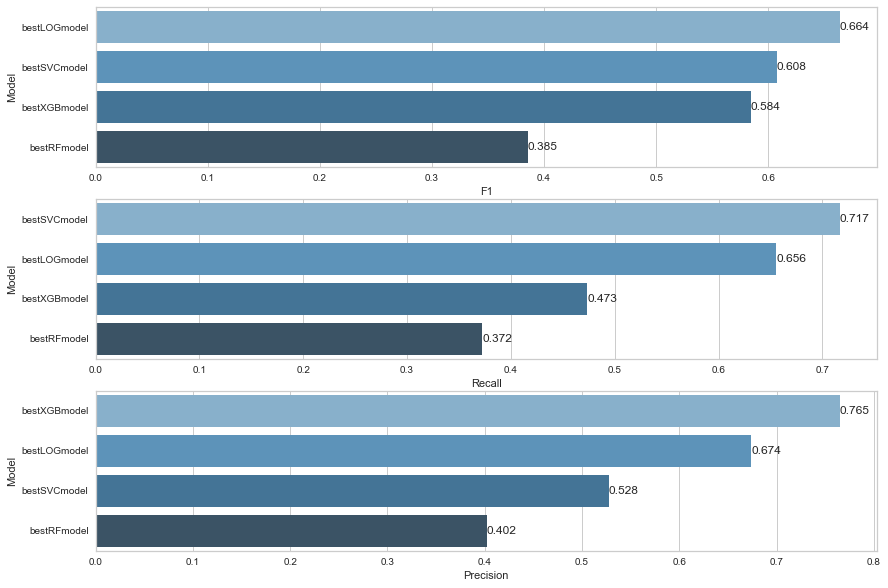

In [78]:
compare = pd.DataFrame({"Model": ["bestLOGmodel", "bestSVCmodel", "bestRFmodel", "bestXGBmodel"],
                        "F1": [LOG_scores[0], SVC_scores[0], RF_scores[0], XGB_scores[0]],
                        "Recall": [LOG_scores[2], SVC_scores[2], RF_scores[2], XGB_scores[2]],
                        "Precision": [LOG_scores[1], SVC_scores[1], RF_scores[1], XGB_scores[1]]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="Precision", ascending=False)
ax=sns.barplot(x="Precision", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

Because of the consistency among the values of Logistic Regression could give us much more easier opportunity to develop our new Race Prediction model. Thus we can spend much more less energy and time to train our model.

In [80]:
operations = [("scaler", MinMaxScaler()), ("best_log_pipeline", LogisticRegression(C = 7.847599703514611, 
                                                                                   class_weight='balanced', max_iter=10000, 
                                                                                   penalty = 'l2', solver = 'liblinear', 
                                                                                   random_state=42))]

finalLOGmodel=Pipeline(steps=operations)

finalLOGmodel.fit(X, y)


f1_2 = make_scorer(f1_score, average=None, labels=[2])
precision_2 = make_scorer(precision_score, average=None, labels=[2])
recall_2 = make_scorer(recall_score, average=None, labels=[2])

scores = cross_validate(bestLOGmodel, X_train, y_train, scoring = {'finalLOGmodel_f1_2':f1_2, 
                                                                   'finalLOGmodel_precision_2':precision_2, 
                                                                   'finalLOGmodel_recall_2':recall_2}, 
                                                                   cv = 5)

finalLOGmodel_scores = pd.DataFrame(scores, index = range(1, 6))
finalLOGmodel_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_finalLOGmodel_f1_2           0.663533
test_finalLOGmodel_precision_2    0.673815
test_finalLOGmodel_recall_2       0.655708
dtype: float64

In [82]:
f1_0 = make_scorer(f1_score, average=None, labels=[0])
precision_0 = make_scorer(precision_score, average=None, labels=[0])
recall_0 = make_scorer(recall_score, average=None, labels=[0])

f1_1 = make_scorer(f1_score, average=None, labels=[1])
precision_1 = make_scorer(precision_score, average=None, labels=[1])
recall_1 = make_scorer(recall_score, average=None, labels=[1])

f1_2 = make_scorer(f1_score, average=None, labels=[2])
precision_2 = make_scorer(precision_score, average=None, labels=[2])
recall_2 = make_scorer(recall_score, average=None, labels=[2])

scores = cross_validate(finalLOGmodel, X, y, scoring = {'f1_0':f1_0,'precision_0':precision_0, 'recall_0':recall_0, 
                                                        'f1_1':f1_1,'precision_1':precision_1, 'recall_1':recall_1,
                                                        'f1_2':f1_2,'precision_2':precision_2, 'recall_2':recall_2},
                                                        cv = 5)

finalLOGmodel = pd.DataFrame(scores, index = range(1, 6))
finalLOGmodel = finalLOGmodel.mean()[2:]

<IPython.core.display.Javascript object>

In [83]:
finalLOGmodel

test_f1_0           0.898707
test_precision_0    0.921975
test_recall_0       0.880792
test_f1_1           0.881237
test_precision_1    0.861364
test_recall_1       0.908298
test_f1_2           0.599019
test_precision_2    0.585395
test_recall_2       0.628845
dtype: float64

## Altta yazılı olan başlıklar ile ilgili domain knowledge yapılarak çözüme gelinmeli

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

Yukaridaki makale Smote islemini detayli bir sekilde anlatiyor. 

##  Smote implement

__Smote__ -----> Dengesiz data setlerinde datadaki en buyuk gozlem sayisi hangi class' a ait ise diger class' larin gozlem sayisini da ona esitler. Mesela datamizdaki en buyuk gozlem sayisi White = 3034 idi. Smote islemi uygulandiginda diger class' lardaki gozlem sayilari da buna esitlenir. Dengesiz datasetlerinde mutlaka denenmelidir :

## Logistic Regression Over/Under Sampling

In [88]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [89]:
over = SMOTE(sampling_strategy={2 : 1095, 1 : 1595})
under = RandomUnderSampler(sampling_strategy={0 : 2195})

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [86]:
operations = [("scaler", MinMaxScaler()), ("log_SmoteRos", LogisticRegression(class_weight="balanced",
                                                                              max_iter=10000, random_state=42))]

pipe_model=Pipeline(steps=operations)


f1_score_weighed = make_scorer(f1_score, average="weighted")

C = np.logspace(-1, 5, 20)
penalty = ["l1", "l2"]
solver = ["liblinear", "saga"]

param_grid = {'log_SmoteRos__C': C,
              'log_SmoteRos__penalty': penalty,
              'log_SmoteRos__solver': solver }

LOGmodel_Smote = GridSearchCV(pipe_model, param_grid, scoring = f1_score_weighed, cv = 5,  n_jobs = -1)

<IPython.core.display.Javascript object>

In [90]:
LOGmodel_Smote.fit(X_resampled, y_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log_SmoteRos',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'log_SmoteRos__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'log_SmoteRos__penalty': ['l1', 'l2'],
                         'log_SmoteRos__solver': ['liblinear', 'saga']},
             scoring=make_scorer(f1_score, average=weighted))

In [91]:
LOGmodel_Smote.best_params_

{'log_SmoteRos__C': 143.8449888287663,
 'log_SmoteRos__penalty': 'l2',
 'log_SmoteRos__solver': 'liblinear'}

In [92]:
operations = [("scaler", MinMaxScaler()), ("LOG_SmoteROS", LogisticRegression(class_weight="balanced", C = 143.8449888287663,
                                                                              penalty = 'l2', solver = 'liblinear',
                                                                              max_iter=10000, random_state=42))]

LOGmodel=Pipeline(steps=operations)

LOGmodel.fit(X_resampled, y_resampled)



f1_0 = make_scorer(f1_score, average=None, labels=[0])
precision_0 = make_scorer(precision_score, average=None, labels=[0])
recall_0 = make_scorer(recall_score, average=None, labels=[0])

f1_1 = make_scorer(f1_score, average=None, labels=[1])
precision_1 = make_scorer(precision_score, average=None, labels=[1])
recall_1 = make_scorer(recall_score, average=None, labels=[1])

f1_2 = make_scorer(f1_score, average=None, labels=[2])
precision_2 = make_scorer(precision_score, average=None, labels=[2])
recall_2 = make_scorer(recall_score, average=None, labels=[2])

f1_score_weighted = make_scorer(f1_score, average="weighted")
recall_score_weighted = make_scorer(recall_score, average="weighted")
precision_score_weighted = make_scorer(precision_score, average="weighted")

scores = cross_validate(LOGmodel, X, y, scoring = {'f1_0':f1_0,'precision_0':precision_0, 'recall_0':recall_0, 
                                                   'f1_1':f1_1,'precision_1':precision_1, 'recall_1':recall_1,
                                                   'f1_2':f1_2,'precision_2':precision_2, 'recall_2':recall_2,
                                                   'f1_score_weighted':f1_score_weighted, 
                                                   'recall_score_weighted' : recall_score_weighted,
                                                   'precision_score_weighted' : precision_score_weighted},
                                                    cv = 5)

LOGmodel_Smote_scores = pd.DataFrame(scores, index = range(1, 6))
LOGmodel_Smote_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_0                        0.889167
test_precision_0                 0.917826
test_recall_0                    0.867077
test_f1_1                        0.866612
test_precision_1                 0.842842
test_recall_1                    0.898266
test_f1_2                        0.584487
test_precision_2                 0.567861
test_recall_2                    0.622974
test_f1_score_weighted           0.848229
test_recall_score_weighted       0.845388
test_precision_score_weighted    0.859739
dtype: float64

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

## Shap values for all data

## SMOTE for X3 dataset

## Find the best threshold for multiclassification

<p style="text-align: center;"><img src="https://lms.techproeducation.com/pluginfile.php/1/theme_edumy/headerlogo2/1663129929/logo.png" class="img-fluid" alt="CLRSWY"></p>